## Top Down - Recursive 

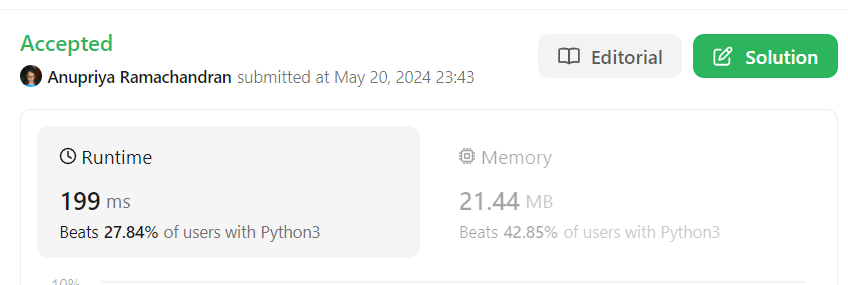

In [1]:
from typing import List
class Solution:
    def maxProfit(self, k: int, prices: List[int]) -> int:
        buy = True
        dp = [[[-1 for _ in range(k + 1)] for _ in range(2)] for _ in range(len(prices))]
        return self.helper(dp, prices, 0, buy, k)
        
    def helper(self, dp, prices, i, buy, k):
        if i == len(prices) or k <= 0:
            return 0
        if dp[i][buy][k] == -1:
            if buy:
                dp[i][buy][k] = max(self.helper(dp, prices, i + 1, not buy, k) - prices[i] , self.helper(dp, prices, i + 1, buy, k))
            else:
                dp[i][buy][k] =  max(prices[i] + self.helper(dp, prices, i + 1, not buy, k-1) , self.helper(dp, prices, i + 1, buy, k))
        return dp[i][buy][k]

# Bottom Up 
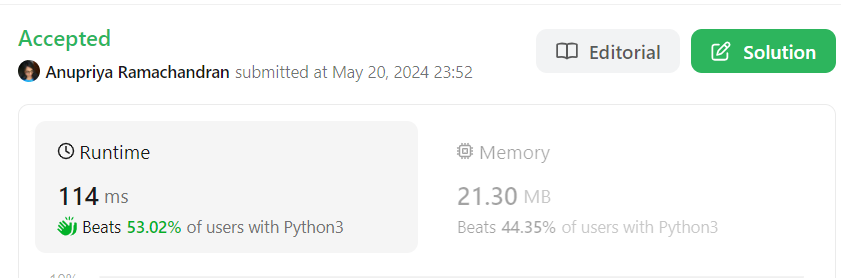

In [2]:
class Solution:
    def maxProfit(self, k: int, prices: List[int]) -> int:
        n = len(prices)
        dp = [[[0 for _ in range(k + 1)] for _ in range(2)] for _ in range(len(prices) + 1)]

        for i in range(n-1, -1, -1):
            for j in range(2):
                for k in range(1, k + 1):
                    if j == 0:
                        dp[i][j][k] = max(dp[i + 1][1][k] - prices[i] , dp[i + 1 ][0][k])
                    else:
                        dp[i][j][k] =  max(prices[i] + dp[i + 1][0][k-1] , dp[i + 1][1][k])

        return dp[0][0][k]

# Space Optimization
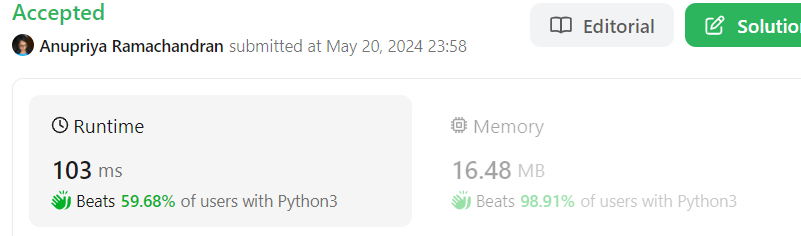

In [3]:
class Solution:
    def maxProfit(self, k: int, prices: List[int]) -> int:
        n = len(prices)
        front = [[0 for _ in range(k + 1)] for _ in range(2)]
        cur = [[0 for _ in range(k + 1)] for _ in range(2)]

        for i in range(n-1, -1, -1):
            for k in range(1, k + 1):
                cur[0][k] = max(front[1][k] - prices[i] , front[0][k])
                cur[1][k] =  max(prices[i] + front[0][k-1] , front[1][k])
                front = cur.copy()

        return cur[0][k]